# Plot SatScan Results

Import libraries

In [1]:
import sys
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geoplot
import mapclassify
sys.path.append(os.path.abspath('..'))
%matplotlib inline

Read files

In [2]:
gd = gpd.read_file("../PySal/municipios/BRMUE250GC_SIR.shp")
gdf = gpd.read_file('output_spatial_analysis_2015_2017/Suicide-SAT.col.shp')

Filter gdf to remove clusters with p-value < 0.05

In [3]:
gdf = gdf[gdf['P_VALUE'] < 0.05]

In [4]:
gdf

,CLUSTER,LOC_ID,LATITUDE,LONGITUDE,RADIUS,START_DATE,END_DATE,NUMBER_LOC,LLR,P_VALUE,OBSERVED,EXPECTED,ODE,REL_RISK,POPULATION,GINI_CLUST,geometry
0,1.0,430187,-30.20,-57.55,914.715250,2015/1/1,2017/12/31,1007.0,1161.030729,1.000000e-17,6368.0,3411.281296,1.866747,2.059452,2.007870e+07,F,"POLYGON ((-57.55000 -21.96860, -57.39563 -21.9..."
1,2.0,432080,-28.81,-52.50,400.869418,2015/1/1,2017/12/31,821.0,1065.595177,1.000000e-17,5412.0,2797.832970,1.934354,2.105201,1.646796e+07,T,"POLYGON ((-52.50000 -25.20263, -52.43046 -25.2..."
2,3.0,290690,-17.73,-39.26,1030.640170,2015/1/1,2017/12/31,1918.0,541.953459,1.000000e-17,14276.0,17346.337784,0.822998,0.701127,1.021000e+08,F,"POLYGON ((-39.26000 -8.45541, -39.09707 -8.456..."
3,4.0,330285,-22.78,-43.42,82.470196,2015/1/1,2017/12/31,39.0,287.883070,1.000000e-17,1302.0,2333.386048,0.557987,0.540914,1.373424e+07,T,"POLYGON ((-43.42000 -22.03786, -43.40603 -22.0..."
4,5.0,291360,-14.78,-39.04,383.479408,2015/1/1,2017/12/31,316.0,243.564409,1.000000e-17,1122.0,2005.455336,0.559474,0.544889,1.180405e+07,T,"POLYGON ((-39.04000 -11.32912, -38.97861 -11.3..."
5,6.0,150170,-1.06,-46.77,445.426150,2015/1/1,2017/12/31,192.0,228.697252,1.000000e-17,856.0,1624.188831,0.527032,0.515178,9.559926e+06,T,"POLYGON ((-46.77000 2.94833, -46.70001 2.94772..."
6,7.0,351380,-23.68,-46.62,25.520590,2015/1/1,2017/12/31,13.0,202.193298,1.000000e-17,1806.0,2760.463599,0.654238,0.635432,1.624801e+07,T,"POLYGON ((-46.62000 -23.45034, -46.61563 -23.4..."
7,8.0,260760,-7.74,-34.82,250.443753,2015/1/1,2017/12/31,357.0,181.679662,1.000000e-17,1598.0,2454.032016,0.651173,0.634490,1.444436e+07,T,"POLYGON ((-34.82000 -5.48629, -34.78050 -5.486..."
8,9.0,316820,-19.88,-46.02,178.742368,2015/1/1,2017/12/31,154.0,175.720813,1.000000e-17,1084.0,582.162968,1.862022,1.889565,3.426594e+06,T,"POLYGON ((-46.02000 -18.27152, -45.99044 -18.2..."
9,10.0,231030,-6.21,-40.69,326.308801,2015/1/1,2017/12/31,417.0,133.271449,1.000000e-17,2067.0,1424.310997,1.451228,1.479540,8.383452e+06,T,"POLYGON ((-40.69000 -3.27359, -40.63869 -3.274..."


Plot results and save to figure

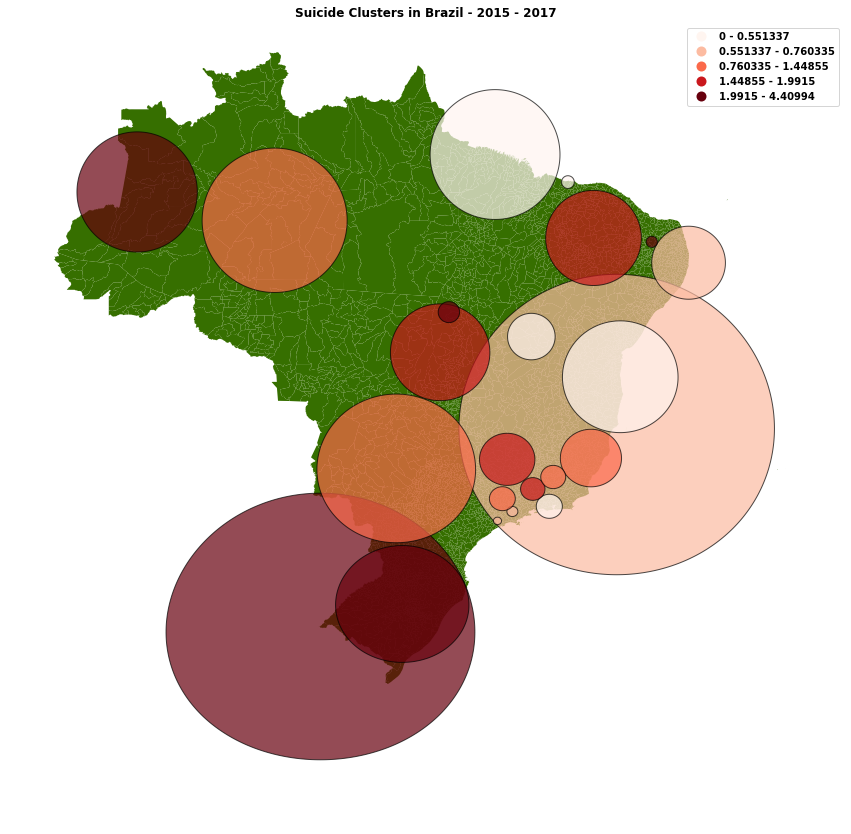

In [5]:
fig, ax = plt.subplots(figsize=(15,15))
gd.plot(ax=ax, color="#366f00")
scheme = mapclassify.Quantiles(gdf["REL_RISK"], k=5)
geoplot.choropleth(
    gdf, hue=gdf["REL_RISK"], scheme=scheme,
    cmap='Reds', ax=ax, legend=True, alpha=0.7
)
plt.title("Suicide Clusters in Brazil - 2015 - 2017")
plt.savefig('clusters.png')

Let's highlight the municipalities inside the clusters.

Read GIS file:

In [6]:
gis = gpd.read_file('output_spatial_analysis_2015_2017/Suicide-SAT.gis.shp')

Filter GIS to remove clusters with p-value < 0.05:

In [7]:
gis = gis[gis['P_VALUE'] < 0.05]

In [8]:
gis.head()

,LOC_ID,CLUSTER,P_VALUE,CLU_OBS,CLU_EXP,CLU_ODE,CLU_RR,CLU_POP,LOC_OBS,LOC_EXP,LOC_ODE,LOC_RR,LOC_POP,LOC_LAT,LOC_LONG,GINI_CLUST,geometry
0,430187,1.0,1.000000e-17,6368.0,3411.281296,1.866747,2.059452,20078698.68,1.0,0.715604,1.397420,1.397432,4212.03,-30.20,-57.55,F,POINT (-57.55000 -30.20000)
1,432240,1.0,1.000000e-17,6368.0,3411.281296,1.866747,2.059452,20078698.68,25.0,22.038648,1.134371,1.134467,129718.82,-29.75,-57.08,F,POINT (-57.08000 -29.75000)
2,431530,1.0,1.000000e-17,6368.0,3411.281296,1.866747,2.059452,20078698.68,6.0,4.001937,1.499274,1.499360,23555.28,-30.38,-56.45,F,POINT (-56.45000 -30.38000)
3,431060,1.0,1.000000e-17,6368.0,3411.281296,1.866747,2.059452,20078698.68,11.0,6.634349,1.658038,1.658244,39049.58,-29.12,-56.55,F,POINT (-56.55000 -29.12000)
4,430040,1.0,1.000000e-17,6368.0,3411.281296,1.866747,2.059452,20078698.68,26.0,13.294003,1.955769,1.956479,78248.10,-29.78,-55.79,F,POINT (-55.79000 -29.78000)


In [9]:
gis[gis['CLU_RR'] > 1.].shape, gis[gis['CLU_RR'] < 1.].shape

((3560, 17), (3112, 17))

In [10]:
def remove_last_digit(x):
    return np.round(x.astype(int) / 10).astype(int)

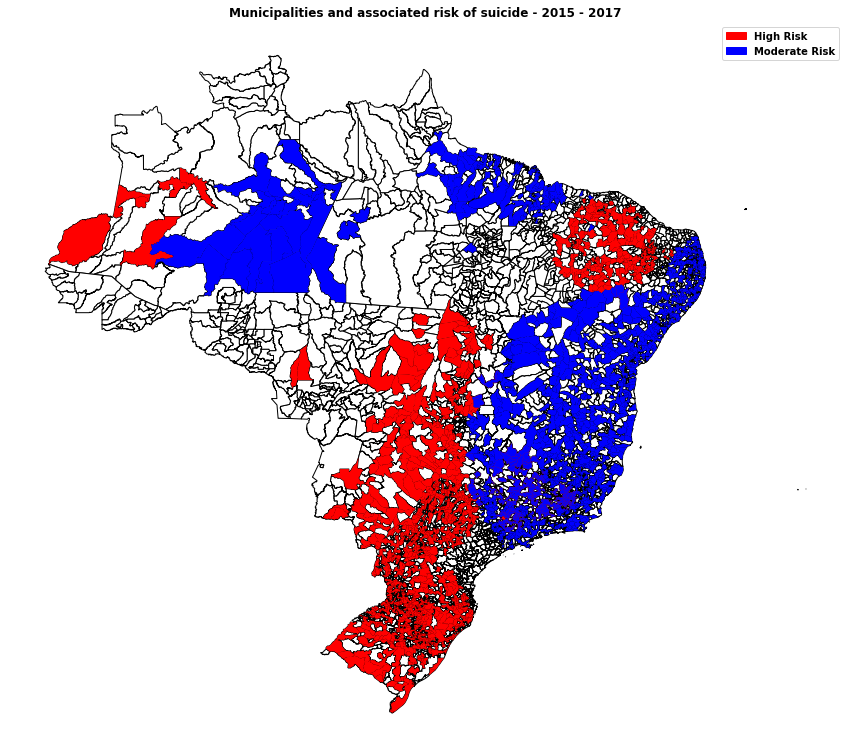

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
gd.plot(ax=ax, color="white", edgecolor='black')

mun_risk_ids = gis[gis['CLU_RR'] > 1.0]['LOC_ID'].astype(int).tolist()
gd_risk = gd[remove_last_digit(gd['CD_GEOCMU']).apply(lambda x: x in mun_risk_ids)]
plot_risk = gd_risk.plot(ax=ax, color="red")

mun_moderate_ids = gis[gis['CLU_RR'] < 1.0]['LOC_ID'].astype(int).tolist()
gd_moderate = gd[remove_last_digit(gd['CD_GEOCMU']).apply(lambda x: x in mun_moderate_ids)]
plot_moderate = gd_moderate.plot(ax=ax, color="blue")

red_patch = mpatches.Patch(color='red', label='High Risk')
blue_patch = mpatches.Patch(color='blue', label='Moderate Risk')
plt.legend(handles=[red_patch, blue_patch])
plt.axis('off')
plt.title("Municipalities and associated risk of suicide - 2015 - 2017")
plt.savefig('municipalities_risk_2015_2017.png')